In [275]:
from bs4 import BeautifulSoup as bs
import urllib
import re
import string
import pandas as pd
from operator import itemgetter

## 1. Load

In [222]:
bi = pd.read_csv('./British_Invasion/Data/List_of_British_Invasion_artists.csv')
print len(bi.artist.values)

bi2 = pd.read_csv('./British_Invasion/Data/List_of_Second_British_Invasion_artists.csv')
print len(bi2.artist.values)

45
51


## 2. Function

In [269]:
def url(artist):
    base = "http://www.lyricsfreak.com/"
    name = artist.lower().strip().translate(None, string.punctuation).split(" ")
    if '' in name:
        name.remove('')
    init = name[0][0]
    search_name = "+".join(name)
    URL = base + init + "/" + search_name + "/"
    return URL

def fetch(artist):
    song_list = []
    URL = url(artist)
    page = urllib.urlopen(URL)
    soup = bs(page, "lxml")
    songs = soup.findAll("table", attrs={"name": "song"})[0].findAll("tr")
    for s in songs:
        for n in s.findAll("td", attrs={"class": "colfirst"}):
            name = re.sub(" Lyrics","",n.find('a').attrs["title"])
            song_list.append(name)
    return song_list

def fetch_all_artists(artist_list):
    lists = {}
    for i, artist in enumerate(artist_list):
        # print artist
        print "\r{}%".format(100.0*(i+1)/len(artist_list)),
        song_list = []
        if artist[:3].lower() == 'the':
            try:
                song_list = fetch(artist)
            except IndexError:
                pass
            try:
                song_list += fetch(artist[4:])
            except IndexError:
                pass
        elif 'and' in artist.split(" "):
            try:
                song_list = fetch(artist)
            except IndexError:
                pass
            try:
                song_list += fetch(re.sub(' and ', ' & ', artist))
            except IndexError:
                pass
        else:
            try:
                song_list = fetch(artist)
            except:
                print "[Warning!] {}: Not Exist".format(artist)
        lists[artist] = song_list
    return lists
            

## 3. Fetch
### { artist : [ list of songs ] ...}

In [271]:
d1 = fetch_all_artists(bi.artist.values)

100.0%


In [272]:
d2 = fetch_all_artists(bi2.artist.values)

45.0980392157% [Warning!] Haircut One Hundred: Not Exist
100.0%


## 4. Check

In [299]:
import pylab as pl
import seaborn as sns
%pylab inline

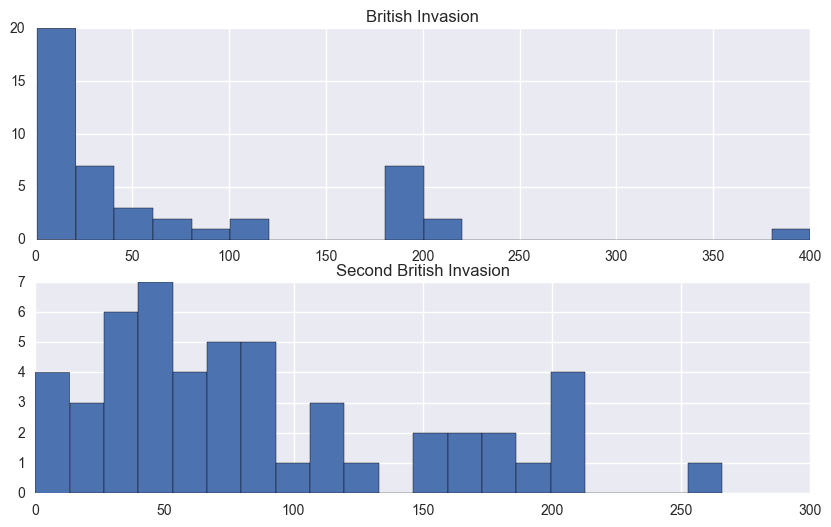

In [321]:
length1 = map((lambda x: len(x)), d1.values())
length2 = map((lambda x: len(x)), d2.values())
f, (ax1, ax2) = pl.subplots(2, 1, figsize=(10,6))
ax1.hist(length1, bins=20)
ax1.set_title("British Invasion")
ax2.hist(length2, bins=20)
ax2.set_title("Second British Invasion")
pl.show()

In [319]:
print "British Invasion: {} songs\nSecond British Invasion: {} songs".format(sum(length1), sum(length2))

British Invasion: 3169 songs
Second British Invasion: 4463 songs


In [323]:
# for a, s in d1.iteritems():
#     print "{}: {}".format(a, len(s))

In [322]:
# for a, s in d2.iteritems():
#     print "{}: {}".format(a, len(s))

## 5. Output

In [320]:
import cPickle as pickle
with open("./BI_Song_List.pkl", 'wb') as fi:
    pickle.dump(d1, fi)
    
with open("./SBI_Song_List.pkl", 'wb') as fi:
    pickle.dump(d2, fi)

<br/><br/>

In [266]:
# ['Wayne Fontana and the Mindbenders', 'Billy J. Kramer & The Dakotas', 'Dave Dee, Dozy, Beaky, Mick & Tich']
# re.sub(' and ', ' & ', 'Wayne Fontana and the Mindbenders')
# url('Wayne Fontana & the Mindbenders')
# 'http://www.lyricsfreak.com/w/wayne+fontana+the+mindbenders/'

In [264]:
# fetch_all_artists(['Haircut One Hundred'])

In [218]:
# l = ["The Who", "Dave Dee, Dozy, Beaky, Mick & Tich", 
#      "Billy J. Kramer & The Dakotas", "16 Horsepower",
#      "The Nashville Teens", "The Beatles", "The Rolling Stones"]
# d = fetch_all_artists(l)
# d['The Who']

# import json
# print(json.dumps(d, indent = 4))

In [217]:
# url("Dave Dee, Dozy, Beaky, Mick & Tich")
# url("Billy J. Kramer & The Dakotas")
# url('16 Horsepower')
# url('The Nashville Teens')

In [73]:
# who = urllib.urlopen("http://www.lyricsfreak.com/w/who/")
# who = urllib.urlopen("http://www.lyricsfreak.com/w/who/")
# soup = bs(who, "lxml")
# songs = soup.findAll("table", attrs={"name": "song"})[0].findAll("tr")
# for s in songs:
#     for n in s.findAll("td", attrs={"class": "colfirst"}):
#         name = re.sub("Lyrics","",n.find('a').attrs["title"])
#         print name

In [214]:
# kinks = urllib.urlopen("http://www.lyricsfreak.com/k/kinks/")
# kinks = urllib.urlopen("http://www.lyricsfreak.com/k/kinks/")
# soup = bs(kinks, "lxml")
# songs = soup.findAll("table", attrs={"name": "song"})[0].findAll("tr")
# for s in songs:
#     for n in s.findAll("td", attrs={"class": "colfirst"}):
#         name = re.sub("Lyrics","",n.find('a').attrs["title"])
#         print name